In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy

from scipy.signal import argrelextrema
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, RobustScaler, MinMaxScaler

In [203]:
right = pd.read_csv('태민우test_20220512144939_R.csv')
left = pd.read_csv('태민우test_20220512144939_L.csv')
right.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']
left.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']

In [8]:
right

,name,addr,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,pr1,pr2,pr3,p4,pr5,pr6,pr7,p8,pr9,pr10,num
0,PSPODR,F6:9C:4F:EE:60:45,1652334580165,-7,0,-33,0,0,0,132,297,203,489,0,0,0,0,0,0,0
1,PSPODR,F6:9C:4F:EE:60:45,1652334580167,-7,0,-33,0,0,0,132,297,203,490,0,0,0,0,0,0,0
2,PSPODR,F6:9C:4F:EE:60:45,1652334580200,-7,0,-32,0,0,0,132,296,203,491,0,0,0,0,0,0,1
3,PSPODR,F6:9C:4F:EE:60:45,1652334580201,-7,0,-33,0,0,0,132,297,203,491,0,0,0,0,0,0,1
4,PSPODR,F6:9C:4F:EE:60:45,1652334580252,-7,0,-33,0,0,0,132,296,204,492,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,PSPODR,F6:9C:4F:EE:60:45,1652334719613,-7,1,-33,0,0,0,245,446,330,342,0,0,0,0,0,0,230
5582,PSPODR,F6:9C:4F:EE:60:45,1652334719654,-7,1,-33,0,0,0,245,446,331,344,0,0,0,0,0,0,231
5583,PSPODR,F6:9C:4F:EE:60:45,1652334719655,-7,1,-33,0,0,0,245,447,332,344,0,0,0,0,0,0,231
5584,PSPODR,F6:9C:4F:EE:60:45,1652334719702,-7,-5,-33,0,0,0,245,447,332,344,0,0,0,0,0,0,232


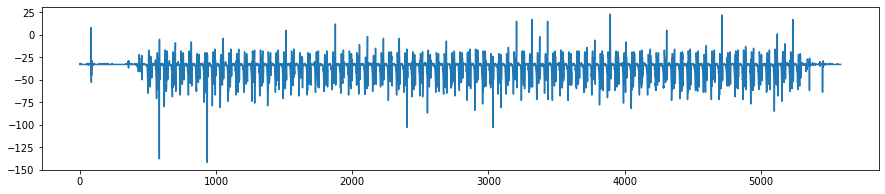

In [16]:
plt.figure(figsize=(15,3))
plt.plot(right['acc_z'])

In [204]:
prs = right.filter(regex="p")
prs_left = left.filter(regex="p")


In [206]:
pres_mean = np.mean(prs.iloc[:, 1:5], axis=1) # timestep 별 40개 압력 측정값의 평균
pres_mean_gf = pd.Series(scipy.ndimage.gaussian_filter1d(np.mean(prs.iloc[:, 1:5], axis=1), 10))
pres_mean_left = np.mean(prs_left.iloc[:, 1:5], axis=1) # timestep 별 40개 압력 측정값의 평균
pres_mean_gf_left = pd.Series(scipy.ndimage.gaussian_filter1d(np.mean(prs_left.iloc[:, 1:5], axis=1), 10))

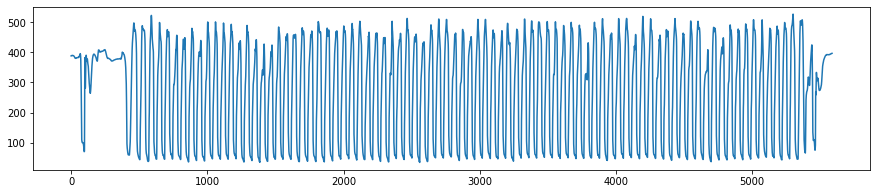

In [207]:
plt.figure(figsize=(15, 3))
plt.plot(pres_mean_left)

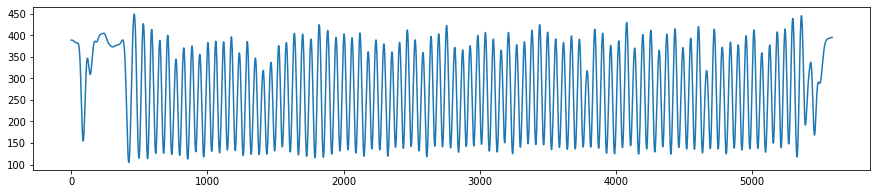

In [208]:
plt.figure(figsize=(15, 3))
plt.plot(pres_mean_gf_left)

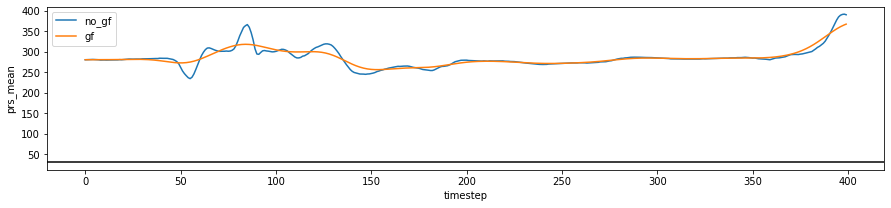

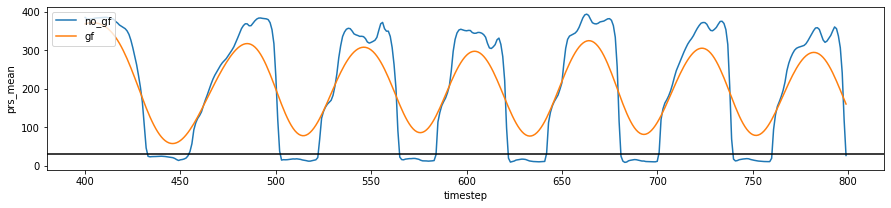

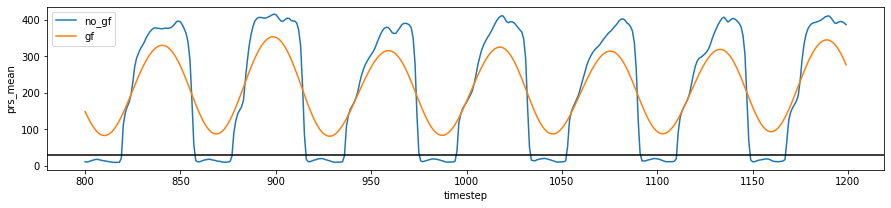

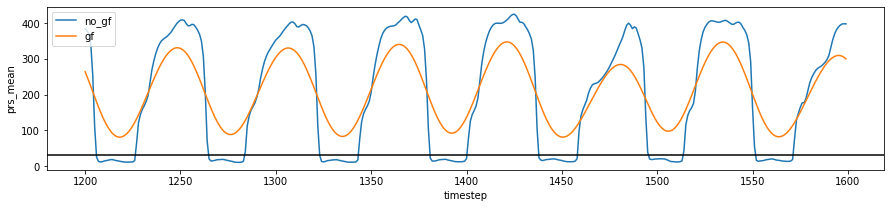

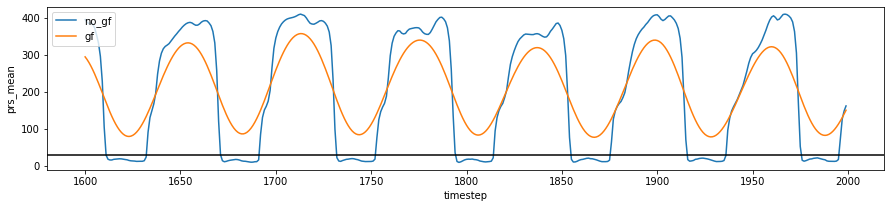

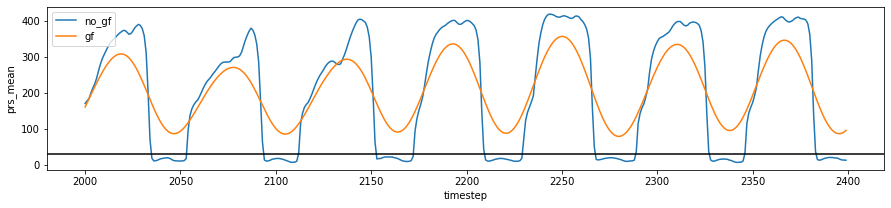

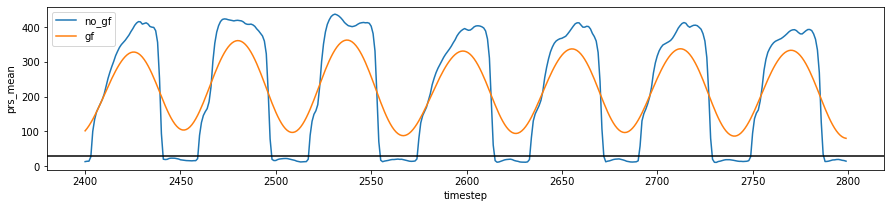

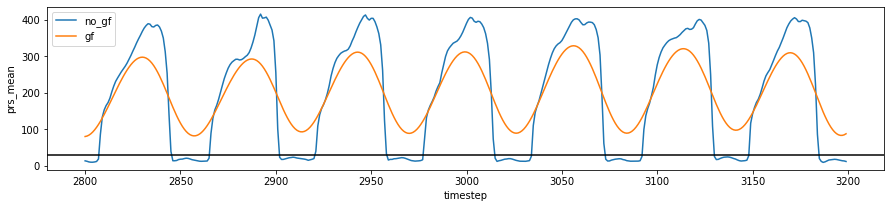

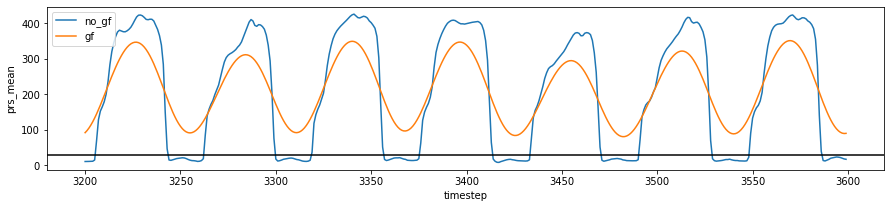

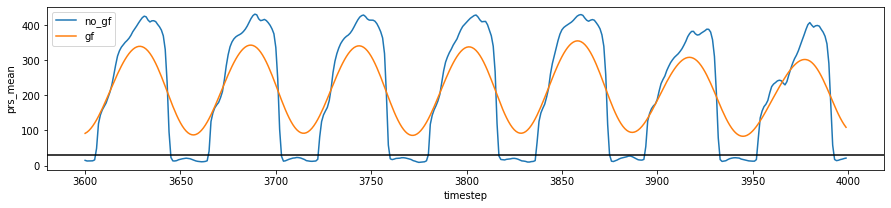

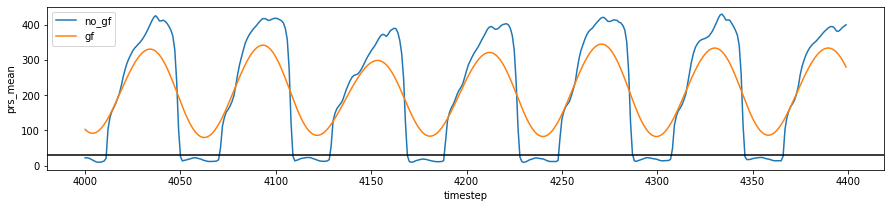

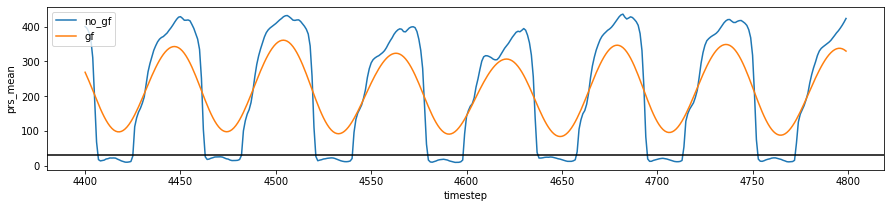

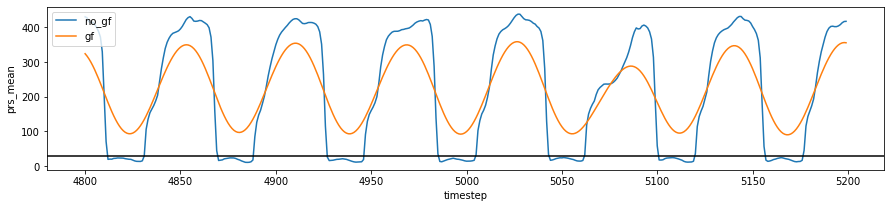

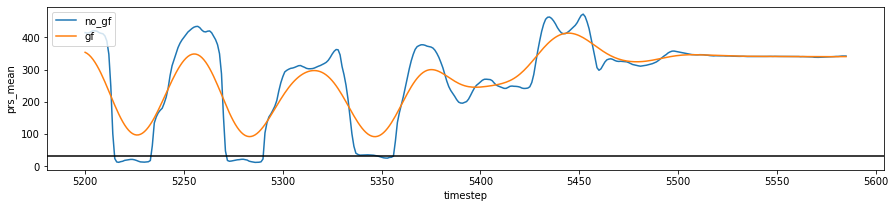

In [90]:
# 40Hz이므로 row가 400개당 10초

n = 400 
pres_10sec = [pres_mean[i*n:(i+1)*n] for i in range((len(pres_mean) + n-1)//n)]
pres_10sec_gf = [pres_mean_gf[i*n:(i+1)*n] for i in range((len(pres_mean_gf) + n-1)//n)] 
for i in range(len(pres_10sec)):
    plt.figure(figsize=(15, 3))
    plt.plot(pres_10sec[i])
    plt.plot(pres_10sec_gf[i])
    plt.xlabel('timestep')
    plt.ylabel('prs_mean')
    plt.legend(labels=['no_gf', 'gf'], loc='upper left')
    plt.axhline(y=30, color='k')
    plt.show()

In [94]:
sum(pres_mean > 30) 

3915

In [59]:
# 미분을 통한 극소값 활용하여 단위걸음 ts 추출
loc_min_idx = argrelextrema(np.array(pres_mean_gf), np.less)[0]
loc_min_idx

array([  50,  111,  153,  244,  318,  446,  514,  576,  633,  693,  752,
        810,  869,  928,  987, 1045, 1103, 1160, 1218, 1276, 1335, 1392,
       1450, 1506, 1564, 1623, 1682, 1744, 1806, 1867, 1928, 1988, 2047,
       2105, 2164, 2221, 2280, 2338, 2395, 2452, 2509, 2567, 2626, 2683,
       2740, 2800, 2857, 2914, 2970, 3026, 3084, 3141, 3197, 3255, 3311,
       3368, 3426, 3482, 3540, 3598, 3657, 3715, 3772, 3829, 3887, 3945,
       4004, 4062, 4122, 4181, 4240, 4300, 4358, 4418, 4474, 4533, 4591,
       4649, 4706, 4765, 4823, 4881, 4939, 4997, 5055, 5112, 5168, 5226,
       5283, 5347, 5398, 5479, 5570], dtype=int64)

In [64]:
gait_unit_hz = np.diff(loc_min_idx_3) # 총 80걸음, 단위 걸음 당 row 갯수
gait_unit_hz

array([ 61,  42,  91,  74, 128,  68,  62,  57,  60,  59,  58,  59,  59,
        59,  58,  58,  57,  58,  58,  59,  57,  58,  56,  58,  59,  59,
        62,  62,  61,  61,  60,  59,  58,  59,  57,  59,  58,  57,  57,
        57,  58,  59,  57,  57,  60,  57,  57,  56,  56,  58,  57,  56,
        58,  56,  57,  58,  56,  58,  58,  59,  58,  57,  57,  58,  58,
        59,  58,  60,  59,  59,  60,  58,  60,  56,  59,  58,  58,  57,
        59,  58,  58,  58,  58,  58,  57,  56,  58,  57,  64,  51,  81,
        91], dtype=int64)

In [66]:
gait_unit_sec = gait_unit_hz/40

In [82]:
gait_unit_dist =  (3000 / 3600) * gait_unit_sec
print(gait_unit_dist)

[1.27083333 0.875      1.89583333 1.54166667 2.66666667 1.41666667
 1.29166667 1.1875     1.25       1.22916667 1.20833333 1.22916667
 1.22916667 1.22916667 1.20833333 1.20833333 1.1875     1.20833333
 1.20833333 1.22916667 1.1875     1.20833333 1.16666667 1.20833333
 1.22916667 1.22916667 1.29166667 1.29166667 1.27083333 1.27083333
 1.25       1.22916667 1.20833333 1.22916667 1.1875     1.22916667
 1.20833333 1.1875     1.1875     1.1875     1.20833333 1.22916667
 1.1875     1.1875     1.25       1.1875     1.1875     1.16666667
 1.16666667 1.20833333 1.1875     1.16666667 1.20833333 1.16666667
 1.1875     1.20833333 1.16666667 1.20833333 1.20833333 1.22916667
 1.20833333 1.1875     1.1875     1.20833333 1.20833333 1.22916667
 1.20833333 1.25       1.22916667 1.22916667 1.25       1.20833333
 1.25       1.16666667 1.22916667 1.20833333 1.20833333 1.1875
 1.22916667 1.20833333 1.20833333 1.20833333 1.20833333 1.20833333
 1.1875     1.16666667 1.20833333 1.1875     1.33333333 1.0625
 1.

In [73]:
len(gait_unit_dist)

92

In [83]:
gait_unit_dist[10:82]

array([1.20833333, 1.22916667, 1.22916667, 1.22916667, 1.20833333,
       1.20833333, 1.1875    , 1.20833333, 1.20833333, 1.22916667,
       1.1875    , 1.20833333, 1.16666667, 1.20833333, 1.22916667,
       1.22916667, 1.29166667, 1.29166667, 1.27083333, 1.27083333,
       1.25      , 1.22916667, 1.20833333, 1.22916667, 1.1875    ,
       1.22916667, 1.20833333, 1.1875    , 1.1875    , 1.1875    ,
       1.20833333, 1.22916667, 1.1875    , 1.1875    , 1.25      ,
       1.1875    , 1.1875    , 1.16666667, 1.16666667, 1.20833333,
       1.1875    , 1.16666667, 1.20833333, 1.16666667, 1.1875    ,
       1.20833333, 1.16666667, 1.20833333, 1.20833333, 1.22916667,
       1.20833333, 1.1875    , 1.1875    , 1.20833333, 1.20833333,
       1.22916667, 1.20833333, 1.25      , 1.22916667, 1.22916667,
       1.25      , 1.20833333, 1.25      , 1.16666667, 1.22916667,
       1.20833333, 1.20833333, 1.1875    , 1.22916667, 1.20833333,
       1.20833333, 1.20833333])

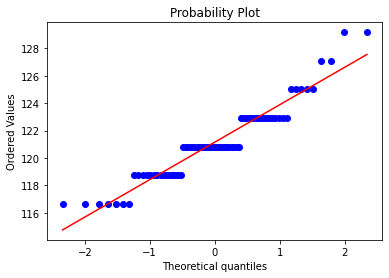

In [85]:
from scipy.stats import probplot 

plt.figure()
probplot(gait_unit_dist[10:82], plot=plt) 
plt.show()



In [80]:
from scipy import stats 
stats.shapiro(gait_unit_dist[10:82])



ShapiroResult(statistic=0.9192891120910645, pvalue=0.00019902574422303587)

In [124]:
lev_shift = pres_mean> 50

In [125]:
lev_shift_int = lev_shift.map(lambda x : 1 if x else 0)

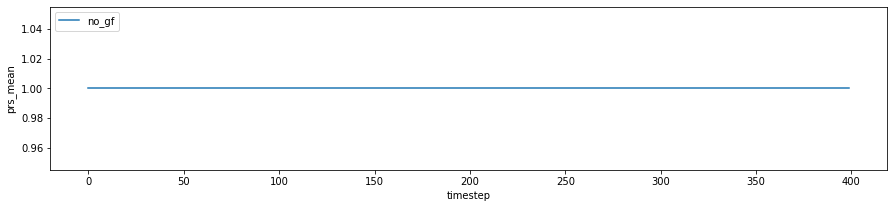

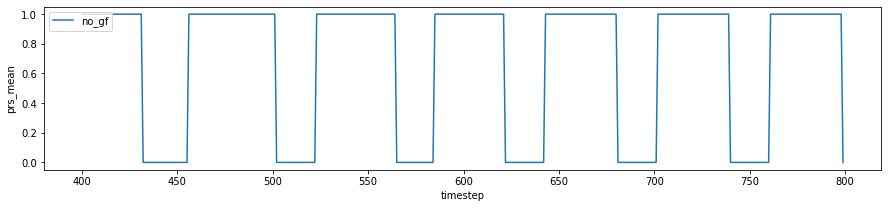

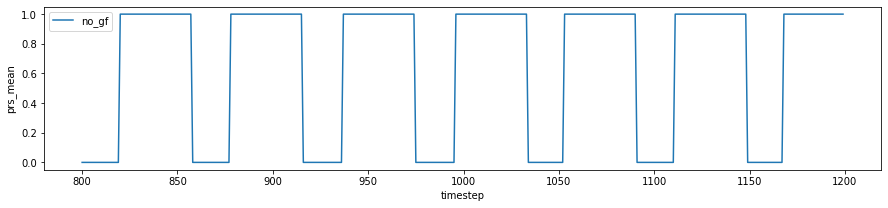

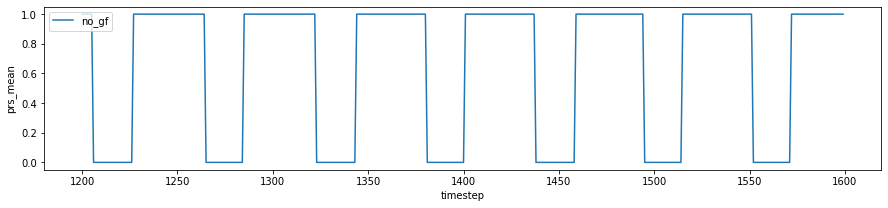

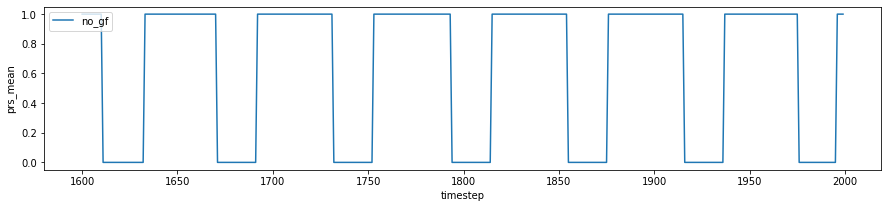

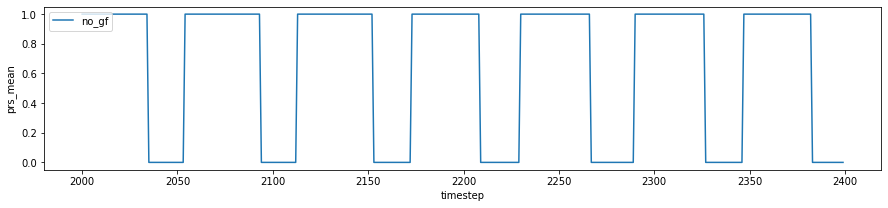

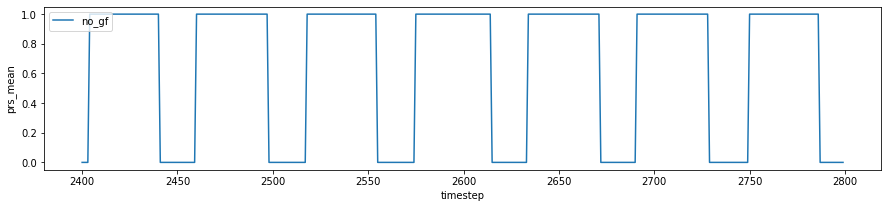

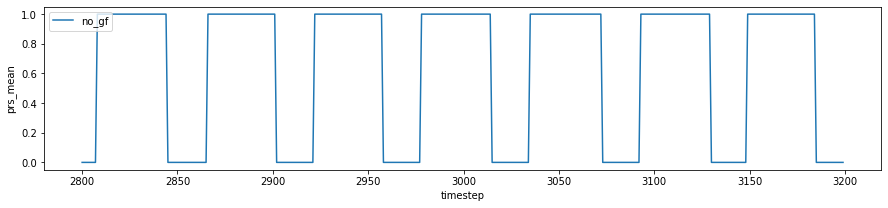

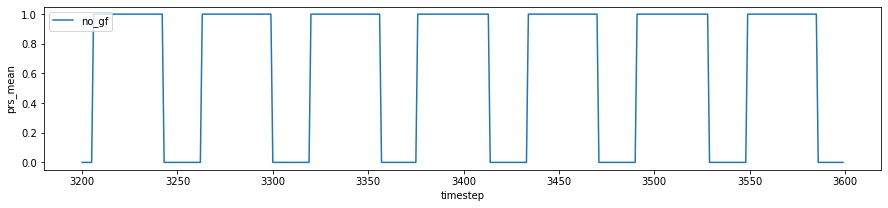

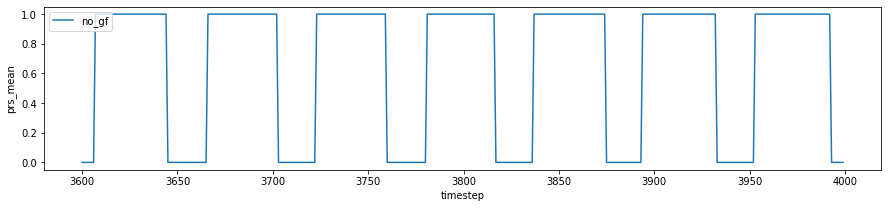

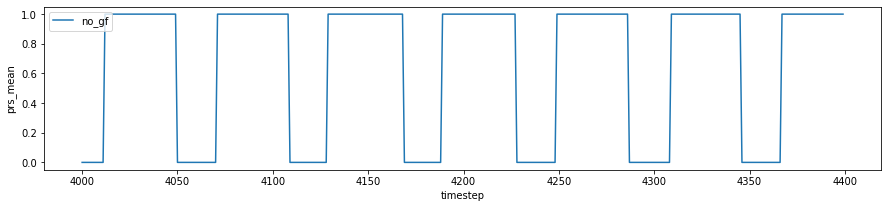

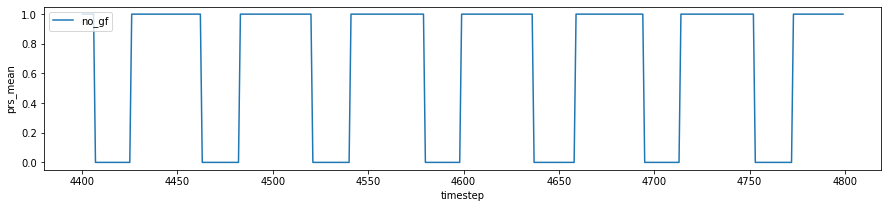

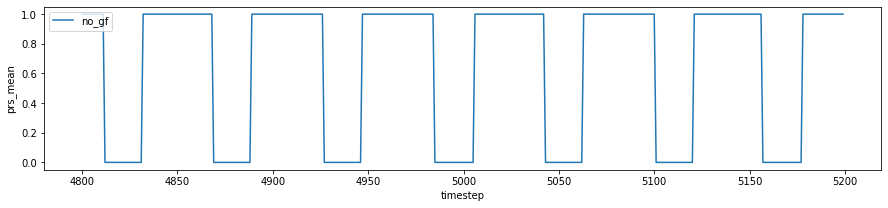

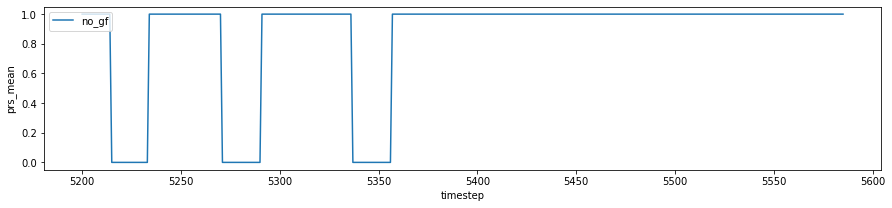

In [126]:
n = 400 
lev_shift_10sec = [lev_shift[i*n:(i+1)*n] for i in range((len(lev_shift) + n-1)//n)]
pres_10sec_gf = [pres_mean_gf[i*n:(i+1)*n] for i in range((len(pres_mean_gf) + n-1)//n)] 
for i in range(len(pres_10sec)):
    plt.figure(figsize=(15, 3))
    plt.plot(lev_shift_10sec[i])
    plt.xlabel('timestep')
    plt.ylabel('prs_mean')
    plt.legend(labels=['no_gf', 'gf'], loc='upper left')
    plt.show()

In [127]:
idx = []
for i in range(len(lev_shift_int)-1):
    if (lev_shift_int[i] - lev_shift_int[i+1]) != 0:
        idx.append(i)
    

In [133]:
idx

[431,
 455,
 501,
 522,
 564,
 584,
 621,
 642,
 680,
 701,
 739,
 760,
 798,
 819,
 857,
 877,
 915,
 936,
 974,
 995,
 1033,
 1052,
 1090,
 1110,
 1148,
 1167,
 1205,
 1226,
 1264,
 1284,
 1322,
 1343,
 1380,
 1400,
 1437,
 1458,
 1494,
 1514,
 1551,
 1571,
 1610,
 1632,
 1670,
 1691,
 1731,
 1752,
 1793,
 1814,
 1854,
 1875,
 1915,
 1936,
 1975,
 1995,
 2034,
 2053,
 2093,
 2112,
 2152,
 2172,
 2208,
 2229,
 2266,
 2289,
 2326,
 2346,
 2382,
 2403,
 2440,
 2459,
 2497,
 2517,
 2554,
 2574,
 2614,
 2633,
 2671,
 2690,
 2728,
 2749,
 2786,
 2807,
 2844,
 2865,
 2901,
 2921,
 2957,
 2977,
 3014,
 3034,
 3072,
 3092,
 3129,
 3148,
 3184,
 3205,
 3242,
 3262,
 3299,
 3319,
 3356,
 3375,
 3413,
 3433,
 3470,
 3490,
 3528,
 3548,
 3585,
 3606,
 3644,
 3665,
 3702,
 3722,
 3759,
 3780,
 3816,
 3836,
 3874,
 3893,
 3932,
 3952,
 3992,
 4011,
 4049,
 4070,
 4108,
 4128,
 4168,
 4188,
 4227,
 4248,
 4286,
 4308,
 4345,
 4366,
 4406,
 4425,
 4462,
 4482,
 4520,
 4540,
 4579,
 4598,
 4636,
 4658

In [128]:
gait_unit_hz_shift = np.diff(idx) # 총 80걸음, 단위 걸음 당 row 갯수
gait_unit_hz_shift

array([24, 46, 21, 42, 20, 37, 21, 38, 21, 38, 21, 38, 21, 38, 20, 38, 21,
       38, 21, 38, 19, 38, 20, 38, 19, 38, 21, 38, 20, 38, 21, 37, 20, 37,
       21, 36, 20, 37, 20, 39, 22, 38, 21, 40, 21, 41, 21, 40, 21, 40, 21,
       39, 20, 39, 19, 40, 19, 40, 20, 36, 21, 37, 23, 37, 20, 36, 21, 37,
       19, 38, 20, 37, 20, 40, 19, 38, 19, 38, 21, 37, 21, 37, 21, 36, 20,
       36, 20, 37, 20, 38, 20, 37, 19, 36, 21, 37, 20, 37, 20, 37, 19, 38,
       20, 37, 20, 38, 20, 37, 21, 38, 21, 37, 20, 37, 21, 36, 20, 38, 19,
       39, 20, 40, 19, 38, 21, 38, 20, 40, 20, 39, 21, 38, 22, 37, 21, 40,
       19, 37, 20, 38, 20, 39, 19, 38, 22, 36, 19, 39, 20, 39, 20, 37, 20,
       38, 20, 38, 21, 37, 20, 38, 20, 36, 21, 37, 19, 37, 20, 46, 20])

In [129]:
gait_unit_sec_shift = gait_unit_hz_shift/40
gait_unit_sec_shift

array([0.6  , 1.15 , 0.525, 1.05 , 0.5  , 0.925, 0.525, 0.95 , 0.525,
       0.95 , 0.525, 0.95 , 0.525, 0.95 , 0.5  , 0.95 , 0.525, 0.95 ,
       0.525, 0.95 , 0.475, 0.95 , 0.5  , 0.95 , 0.475, 0.95 , 0.525,
       0.95 , 0.5  , 0.95 , 0.525, 0.925, 0.5  , 0.925, 0.525, 0.9  ,
       0.5  , 0.925, 0.5  , 0.975, 0.55 , 0.95 , 0.525, 1.   , 0.525,
       1.025, 0.525, 1.   , 0.525, 1.   , 0.525, 0.975, 0.5  , 0.975,
       0.475, 1.   , 0.475, 1.   , 0.5  , 0.9  , 0.525, 0.925, 0.575,
       0.925, 0.5  , 0.9  , 0.525, 0.925, 0.475, 0.95 , 0.5  , 0.925,
       0.5  , 1.   , 0.475, 0.95 , 0.475, 0.95 , 0.525, 0.925, 0.525,
       0.925, 0.525, 0.9  , 0.5  , 0.9  , 0.5  , 0.925, 0.5  , 0.95 ,
       0.5  , 0.925, 0.475, 0.9  , 0.525, 0.925, 0.5  , 0.925, 0.5  ,
       0.925, 0.475, 0.95 , 0.5  , 0.925, 0.5  , 0.95 , 0.5  , 0.925,
       0.525, 0.95 , 0.525, 0.925, 0.5  , 0.925, 0.525, 0.9  , 0.5  ,
       0.95 , 0.475, 0.975, 0.5  , 1.   , 0.475, 0.95 , 0.525, 0.95 ,
       0.5  , 1.   ,

In [134]:
len(gait_unit_sec_shift)

169

## 0512_3km

In [30]:
right_0512 = pd.read_csv('태민우test_20220512144939_R.csv')
right_0512.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']

In [32]:
left_0512 = pd.read_csv('태민우test_20220512144939_L.csv')
left_0512.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']

In [40]:
# 총 측정 시간 : 139.65초
len(right_0512) / 40

139.65

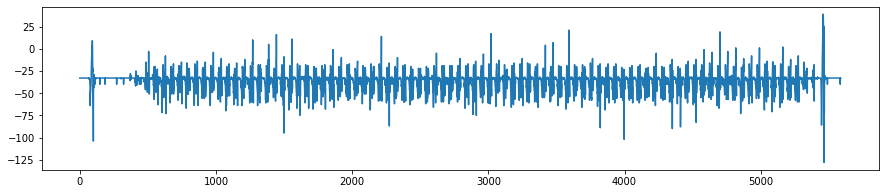

In [33]:
plt.figure(figsize=(15,3))
plt.plot(left_0512['acc_z'])

In [44]:
# 영상 기준 2.744초에서 왼쪽 발구르기 실시, 센서 데이터(acc_z)에서 해당 인덱스 찾아 싱크 맞추기

np.where(left_0512['acc_z']< -100) # 100번째 인덱스

(array([ 100, 3997, 5465], dtype=int64),)

In [359]:
# 센서 측정 시작 뒤 2.5초, 영상이 0.231초 더 느림

1.6666666666666667

In [298]:
# 영상 기준 15.193초를 첫 HS로 측정, 즉 센서 데이터에서는 14.953초에 해당하는 인덱스
14.962 * 60 # 약 898번째

897.72

In [299]:
# 영상 기준 119.364초를 마지막 TO로 측정, 즉 센서 데이터에서는 119.124초에 해당하는 인덱스
119.364 * 60 # 약 7162번째

7161.84

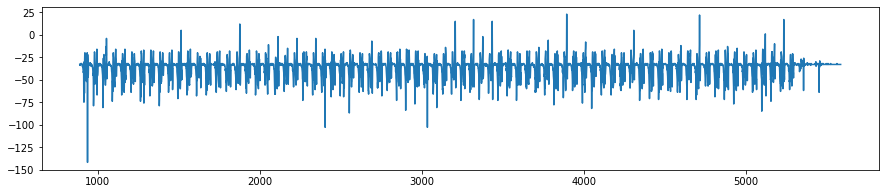

In [300]:
plt.figure(figsize=(15,3))
plt.plot(right_0512[888:7172]['acc_z'])

In [212]:
right_0512_anno = pd.read_csv('220512_태민우_3km.txt', sep='\t', header=None)
len(right_0512_anno) # 발구르기 빼고 72걸음

73

In [215]:
prs_0512 = right_0512.filter(regex="p")
pres_mean_0512 = np.mean(prs_0512.iloc[:, 1:5], axis=1) # timestep 별 4개 압력 측정값의 평균
pres_mean_gf_0512 = pd.Series(scipy.ndimage.gaussian_filter1d(np.mean(prs_0512.iloc[:, 1:5], axis=1), 10))

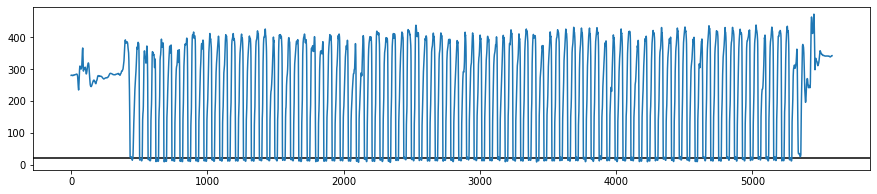

In [295]:
plt.figure(figsize=(15,3))
plt.axhline(y=20, color='k')
plt.plot(pres_mean_0512)

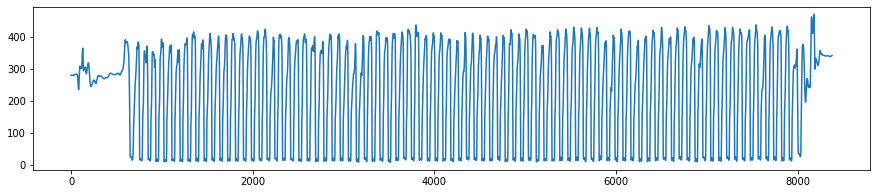

In [319]:
interpolate_freq = int(len(pres_mean_0512) * (60/40))
pres_mean_0512_interpolate = cv2.resize(np.array(pres_mean_0512), dsize=(1, interpolate_freq))
plt.figure(figsize=(15,3))
plt.plot(pres_mean_0512_interpolate)

In [341]:
pd.Series(pres_mean_0512_interpolate[888:7172].flatten())

0       239.749207
1       271.625000
2       302.167297
3       322.832703
4       336.375000
           ...    
6279    186.044312
6280    198.375000
6281    212.995117
6282    233.004883
6283    250.000000
Length: 6284, dtype: float64

In [349]:
lev_shift_0512 = pd.Series(pres_mean_0512_interpolate[888:7172].flatten())> 30
lev_shift_int_0512 = lev_shift_0512.map(lambda x : 1 if x else 0)

In [350]:
lev_shift_int_0512 = lev_shift_int_0512.reset_index(drop=True)

In [351]:
idx_0512 = []
for i in range(len(lev_shift_int_0512)-1):
    if (lev_shift_int_0512[i] - lev_shift_int_0512[i+1]) != 0:
        idx_0512.append(i)
    

In [352]:
gait_unit_hz_shift_0512 = np.diff(idx_0512) # 총 80걸음, 단위 걸음 당 row 갯수
gait_unit_hz_shift_0512

array([30, 58, 30, 58, 31, 58, 30, 58, 29, 58, 31, 59, 29, 58, 28, 59, 28,
       58, 28, 58, 30, 58, 28, 59, 31, 56, 29, 57, 30, 56, 27, 57, 30, 59,
       32, 58, 31, 61, 30, 63, 30, 61, 31, 60, 31, 59, 30, 59, 27, 61, 28,
       61, 29, 56, 30, 57, 32, 58, 28, 56, 29, 57, 27, 58, 29, 57, 29, 61,
       28, 58, 27, 58, 30, 58, 30, 57, 29, 56, 28, 56, 29, 56, 29, 58, 29,
       57, 27, 55, 31, 57, 28, 56, 29, 57, 28, 57, 30, 56, 29, 58, 29, 57,
       29, 59, 30, 57, 29, 56, 31, 55, 29, 58, 28, 59, 29, 61, 27, 59, 30,
       58, 29, 61, 29, 60, 30, 59, 30, 58, 30, 61, 27, 57, 29, 58, 29, 59,
       28, 59, 30, 56, 28, 59, 29])

In [353]:
gait_unit_sec_shift_0512 = gait_unit_hz_shift_0512/60
gait_unit_sec_shift_0512

array([0.5       , 0.96666667, 0.5       , 0.96666667, 0.51666667,
       0.96666667, 0.5       , 0.96666667, 0.48333333, 0.96666667,
       0.51666667, 0.98333333, 0.48333333, 0.96666667, 0.46666667,
       0.98333333, 0.46666667, 0.96666667, 0.46666667, 0.96666667,
       0.5       , 0.96666667, 0.46666667, 0.98333333, 0.51666667,
       0.93333333, 0.48333333, 0.95      , 0.5       , 0.93333333,
       0.45      , 0.95      , 0.5       , 0.98333333, 0.53333333,
       0.96666667, 0.51666667, 1.01666667, 0.5       , 1.05      ,
       0.5       , 1.01666667, 0.51666667, 1.        , 0.51666667,
       0.98333333, 0.5       , 0.98333333, 0.45      , 1.01666667,
       0.46666667, 1.01666667, 0.48333333, 0.93333333, 0.5       ,
       0.95      , 0.53333333, 0.96666667, 0.46666667, 0.93333333,
       0.48333333, 0.95      , 0.45      , 0.96666667, 0.48333333,
       0.95      , 0.48333333, 1.01666667, 0.46666667, 0.96666667,
       0.45      , 0.96666667, 0.5       , 0.96666667, 0.5    

In [358]:
np.round(gait_unit_sec_shift_0512[gait_unit_sec_shift_0512>0.7], 3)

array([0.967, 0.967, 0.967, 0.967, 0.967, 0.983, 0.967, 0.983, 0.967,
       0.967, 0.967, 0.983, 0.933, 0.95 , 0.933, 0.95 , 0.983, 0.967,
       1.017, 1.05 , 1.017, 1.   , 0.983, 0.983, 1.017, 1.017, 0.933,
       0.95 , 0.967, 0.933, 0.95 , 0.967, 0.95 , 1.017, 0.967, 0.967,
       0.967, 0.95 , 0.933, 0.933, 0.933, 0.967, 0.95 , 0.917, 0.95 ,
       0.933, 0.95 , 0.95 , 0.933, 0.967, 0.95 , 0.983, 0.95 , 0.933,
       0.917, 0.967, 0.983, 1.017, 0.983, 0.967, 1.017, 1.   , 0.983,
       0.967, 1.017, 0.95 , 0.967, 0.983, 0.983, 0.933, 0.983])

In [355]:
len(gait_unit_sec_shift_0512[gait_unit_sec_shift_0512>0.7])

71

## 0524_3km

In [76]:
right_0524 = pd.read_csv('220524_태민우_3km_R.csv')
right_0524.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']

In [77]:
# 총 측정 시간 : 96.45초
len(right_0524) / 40

96.45

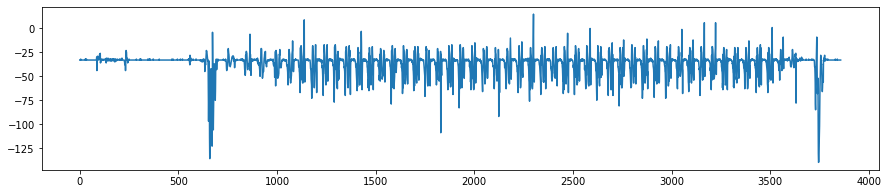

In [78]:
plt.figure(figsize=(15,3))
plt.plot(right_0524['acc_z'])

In [79]:
# 영상 기준 36.624초에서 오른쪽 발회전 실시, 센서 데이터(acc_z)에서 해당 인덱스 찾아 싱크 맞추기

np.where(right_0524['acc_z']< -100) # 677번째 인덱스에서 회전이 끝

(array([ 658,  659,  660,  661,  670,  671,  672,  677, 1830, 3743, 3744,
        3745, 3746, 3747, 3748, 3749, 3750], dtype=int64),)

In [80]:
677 / 40 # 센서 측정 시작 뒤 16.925초, 영상과 19.699초 차이

16.925

In [84]:
# 영상 기준 53.493초를 첫 HS로 측정, 즉 센서 데이터에서는 36.494초에 해당하는 인덱스
36.494 * 40 # 약 1460번째

1459.76

In [86]:
# 영상 기준 96.481초를 마지막 TO로 측정, 즉 센서 데이터에서는 76.782초에 해당하는 인덱스
76.782 * 40 # 약 3071번째

3071.2799999999997

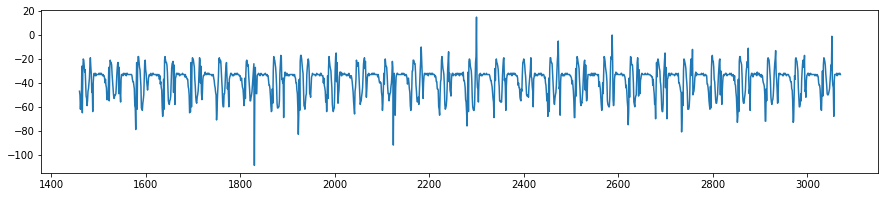

In [87]:
plt.figure(figsize=(15,3))
plt.plot(right_0524[1460:3071]['acc_z'])

In [88]:
right_0524_anno = pd.read_csv('220524_태민우_3km.txt', sep='\t', header=None)
len(right_0524_anno) # 30걸음

30

In [90]:
prs_0524 = right_0524.filter(regex="p")
pres_mean_0524 = np.mean(prs_0524.iloc[:, 1:5], axis=1) # timestep 별 4개 압력 측정값의 평균
pres_mean_gf_0524 = pd.Series(scipy.ndimage.gaussian_filter1d(np.mean(prs_0524.iloc[:, 1:5], axis=1), 10))

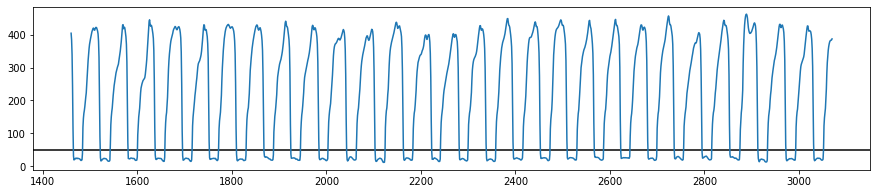

In [91]:
plt.figure(figsize=(15,3))
plt.axhline(y=50, color='k')
plt.plot(pres_mean_0524[1460:3071])

In [113]:
lev_shift_0524 = pres_mean_0524[1460:3071]> 50
lev_shift_int_0524 = lev_shift_0524.map(lambda x : 1 if x else 0)

In [114]:
lev_shift_int_0524 = lev_shift_int_0524.reset_index(drop=True)

In [115]:
idx_0524 = []
for i in range(len(lev_shift_int_0524)-1):
    if (lev_shift_int_0524[i] - lev_shift_int_0524[i+1]) != 0:
        idx_0524.append(i)
    

In [116]:
gait_unit_hz_shift_0524 = np.diff(idx_0524) # 총 30걸음, 단위 걸음 당 row 갯수
gait_unit_hz_shift_0524

array([20, 37, 21, 38, 20, 37, 21, 37, 20, 37, 19, 38, 21, 37, 21, 36, 21,
       39, 19, 39, 21, 40, 21, 39, 20, 39, 19, 40, 18, 39, 20, 37, 20, 37,
       21, 36, 21, 36, 20, 36, 20, 38, 19, 37, 19, 39, 21, 38, 22, 38, 20,
       39, 21, 38, 20])

In [117]:
gait_unit_sec_shift_0524 = gait_unit_hz_shift_0524/40
gait_unit_sec_shift_0524

array([0.5  , 0.925, 0.525, 0.95 , 0.5  , 0.925, 0.525, 0.925, 0.5  ,
       0.925, 0.475, 0.95 , 0.525, 0.925, 0.525, 0.9  , 0.525, 0.975,
       0.475, 0.975, 0.525, 1.   , 0.525, 0.975, 0.5  , 0.975, 0.475,
       1.   , 0.45 , 0.975, 0.5  , 0.925, 0.5  , 0.925, 0.525, 0.9  ,
       0.525, 0.9  , 0.5  , 0.9  , 0.5  , 0.95 , 0.475, 0.925, 0.475,
       0.975, 0.525, 0.95 , 0.55 , 0.95 , 0.5  , 0.975, 0.525, 0.95 ,
       0.5  ])

In [270]:
1 / 30 - 1/40

0.008333333333333331

In [122]:
gait_unit_sec_shift_0524[gait_unit_sec_shift_0524 > 0.7]

array([0.925, 0.95 , 0.925, 0.925, 0.925, 0.95 , 0.925, 0.9  , 0.975,
       0.975, 1.   , 0.975, 0.975, 1.   , 0.975, 0.925, 0.925, 0.9  ,
       0.9  , 0.9  , 0.95 , 0.925, 0.975, 0.95 , 0.95 , 0.975, 0.95 ])

In [125]:
len(gait_unit_sec_shift_0524[gait_unit_sec_shift_0524 > 0.7])

27

In [124]:
gait_unit_sec_shift_0512[gait_unit_sec_shift_0512 > 0.7]

array([0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 ,
       0.95 , 0.95 , 0.95 , 0.925, 0.925, 0.9  , 0.925, 0.975, 0.95 ,
       1.   , 1.025, 1.   , 1.   , 0.975, 0.975, 1.   , 1.   , 0.9  ,
       0.925, 0.925, 0.9  , 0.925, 0.95 , 0.925, 1.   , 0.95 , 0.95 ,
       0.925, 0.925, 0.9  , 0.9  , 0.925, 0.95 , 0.925, 0.9  , 0.925,
       0.925, 0.925, 0.95 , 0.925, 0.95 , 0.925, 0.95 , 0.925, 0.925,
       0.9  , 0.95 , 0.975, 1.   , 0.95 , 0.95 , 1.   , 0.975, 0.95 ,
       0.925, 1.   , 0.925, 0.95 , 0.975, 0.95 , 0.9  , 0.975])

In [223]:
len(gait_unit_sec_shift_0512[gait_unit_sec_shift_0512 > 0.7])

71

In [182]:
right_0524_anno_gait = right_0524_anno.loc[:, 4][2:-1]
right_0512_anno_gait = right_0512_anno.loc[:, 4][1:-1]

In [153]:
float(right_0524_anno_gait[0][-5:])

0.96

In [183]:
wil_x = np.hstack([right_0524_anno_gait, right_0512_anno_gait])

In [175]:
wil_y = np.hstack([gait_unit_sec_shift_0524[gait_unit_sec_shift_0524 > 0.7], gait_unit_sec_shift_0512[gait_unit_sec_shift_0512 > 0.7]])

In [184]:
ex = []
for i in range(len(wil_x)):
    ex.append(float(wil_x[i][-5:]))
    

In [189]:
from scipy.stats import wilcoxon
scipy.stats.wilcoxon(np.array(ex)*100, wil_y*100)

In [198]:
map(*100, ex)

TypeError: type object argument after * must be an iterable, not int

In [199]:
scipy.stats.wilcoxon(np.array(ex)*100, wil_y*100)

WilcoxonResult(statistic=971.0, pvalue=2.505215161596965e-07)

In [201]:
wil_y

array([0.925, 0.95 , 0.925, 0.925, 0.925, 0.95 , 0.925, 0.9  , 0.975,
       0.975, 1.   , 0.975, 0.975, 1.   , 0.975, 0.925, 0.925, 0.9  ,
       0.9  , 0.9  , 0.95 , 0.925, 0.975, 0.95 , 0.95 , 0.975, 0.95 ,
       0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 ,
       0.95 , 0.95 , 0.95 , 0.925, 0.925, 0.9  , 0.925, 0.975, 0.95 ,
       1.   , 1.025, 1.   , 1.   , 0.975, 0.975, 1.   , 1.   , 0.9  ,
       0.925, 0.925, 0.9  , 0.925, 0.95 , 0.925, 1.   , 0.95 , 0.95 ,
       0.925, 0.925, 0.9  , 0.9  , 0.925, 0.95 , 0.925, 0.9  , 0.925,
       0.925, 0.925, 0.95 , 0.925, 0.95 , 0.925, 0.95 , 0.925, 0.925,
       0.9  , 0.95 , 0.975, 1.   , 0.95 , 0.95 , 1.   , 0.975, 0.95 ,
       0.925, 1.   , 0.925, 0.95 , 0.975, 0.95 , 0.9  , 0.975])

In [200]:
ex

[0.944,
 0.96,
 0.96,
 0.96,
 0.927,
 0.96,
 0.943,
 0.91,
 0.994,
 0.977,
 0.994,
 0.994,
 0.994,
 1.01,
 0.96,
 0.927,
 0.943,
 0.943,
 0.943,
 0.91,
 0.96,
 0.943,
 0.993,
 0.976,
 0.994,
 1.011,
 0.977,
 0.926,
 0.943,
 0.96,
 0.977,
 0.96,
 0.96,
 0.943,
 0.927,
 0.926,
 0.977,
 0.943,
 0.943,
 0.943,
 0.926,
 0.926,
 0.909,
 0.927,
 1.011,
 0.976,
 0.993,
 1.044,
 1.011,
 0.993,
 0.96,
 0.977,
 1.01,
 1.002,
 0.943,
 0.96,
 0.96,
 0.943,
 0.926,
 0.977,
 0.943,
 1.01,
 0.977,
 0.96,
 0.977,
 0.977,
 0.927,
 0.96,
 0.96,
 0.976,
 0.943,
 0.943,
 0.96,
 0.96,
 0.96,
 0.976,
 0.943,
 0.943,
 0.96,
 0.993,
 0.96,
 0.943,
 0.927,
 0.96,
 0.977,
 1.01,
 0.976,
 0.976,
 1.01,
 0.977,
 0.977,
 0.977,
 1.028,
 0.943,
 0.977,
 1.011,
 0.977,
 0.943]

In [2]:
from scipy import signal
import matplotlib.pyplot as plt

In [280]:
ydem = signal.decimate(pres_mean_0524, 2)

In [278]:
40/30

1.3333333333333333

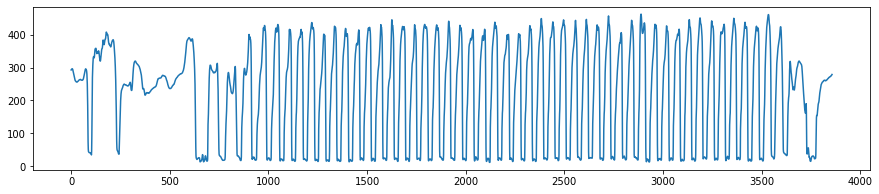

In [272]:
plt.figure(figsize=(15,3))
plt.plot(pres_mean_0524)

5144

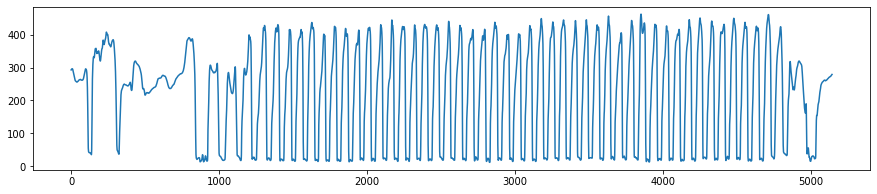

In [308]:
plt.figure(figsize=(15,3))
plt.plot(cv2.resize(np.array(pres_mean_0524), dsize=(1, 5144)))

In [2]:
right_0526 = pd.read_csv('220526_태민우_3km_R.csv')
right_0526.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']

In [3]:
len(right_0526) / 40

231.05

In [4]:
prs_0526 = right_0526.filter(regex="p")
pres_mean_0526 = np.mean(prs_0526.iloc[:, 1:5], axis=1) # timestep 별 4개 압력 측정값의 평균
pres_mean_gf_0526 = pd.Series(scipy.ndimage.gaussian_filter1d(np.mean(prs_0526.iloc[:, 1:5], axis=1), 10))

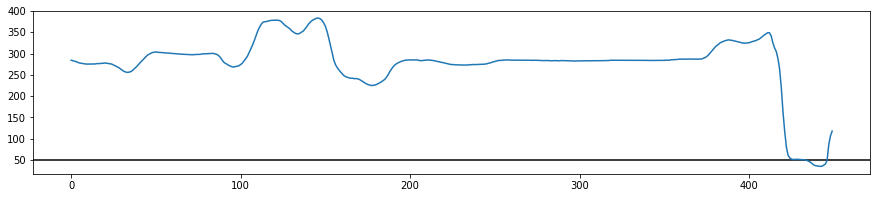

In [5]:
plt.figure(figsize=(15,3))
plt.axhline(y=50, color='k')
plt.plot(pres_mean_0526[:450])

In [6]:
60*20.5

1230.0

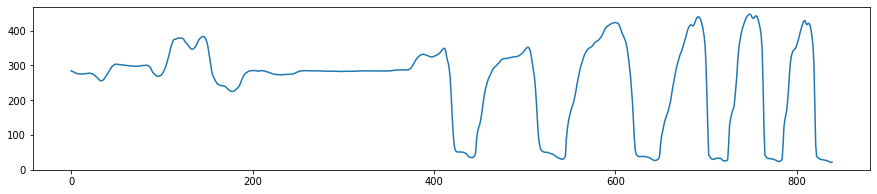

In [7]:
plt.figure(figsize=(15,3))
plt.plot(pres_mean_0526[:840])

In [8]:
# index 840부터영상 anntation

In [9]:
int(len(pres_mean_0526)*intp)

NameError: name 'intp' is not defined

interpolation before / after : 9242 / 13863


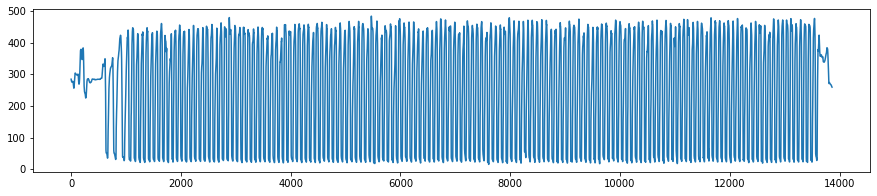

In [10]:
# sampling rate를 영상 frame과 동일하게 통일
sampling_rate = 40
frame = 60
intp = frame / sampling_rate

pres_mean_intp_0526 = cv2.resize(np.array(pres_mean_0526), dsize=(1, int(len(pres_mean_0526)*intp)))

plt.figure(figsize=(15,3))
plt.plot(pres_mean_intp_0526)
print('interpolation before / after :',len(pres_mean_0526), '/', len(pres_mean_intp_0526))

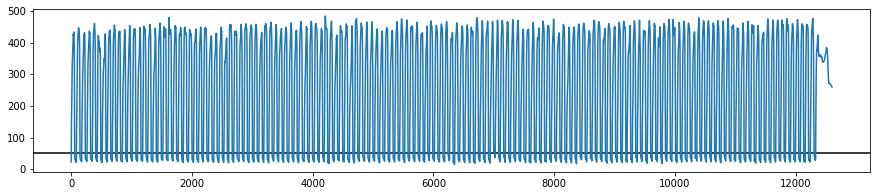

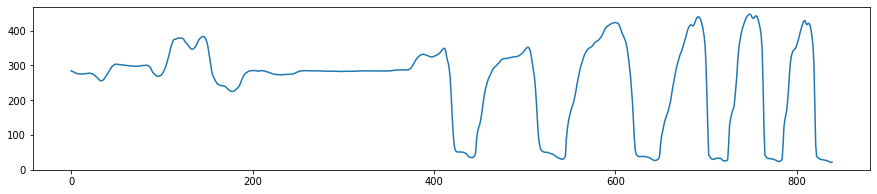

In [11]:
plt.figure(figsize=(15,3))
plt.axhline(y=50, color='k')
plt.plot(pres_mean_intp_0526[1260:])
plt.figure(figsize=(15,3))
plt.plot(pres_mean_0526[:840])

In [12]:
lev_shift_0526 = pd.Series(pres_mean_intp_0526[1260:].flatten())> 50
lev_shift_int_0526 = lev_shift_0526.map(lambda x : 1 if x else 0)
lev_shift_int_0526 = lev_shift_int_0526.reset_index(drop=True)

In [13]:
idx_0526 = []
for i in range(len(lev_shift_int_0526)-1):
    if (lev_shift_int_0526[i] - lev_shift_int_0526[i+1]) != 0:
        idx_0526.append(i)
    

In [14]:
gait_unit_hz_shift_0526 = np.diff(idx_0526) 
gait_unit_hz_shift_0526

array([56, 30, 58, 30, 58, 30, 57, 29, 55, 27, 58, 25, 60, 25, 56, 27, 55,
       24, 55, 31, 55, 28, 55, 27, 57, 30, 56, 29, 55, 28, 56, 29, 56, 27,
       54, 30, 55, 29, 60, 25, 56, 28, 58, 27, 58, 28, 56, 28, 53, 30, 53,
       27, 56, 29, 58, 28, 56, 31, 54, 27, 55, 25, 55, 28, 56, 32, 54, 27,
       56, 28, 55, 27, 54, 26, 58, 25, 55, 29, 54, 28, 55, 26, 55, 28, 55,
       30, 54, 28, 55, 28, 58, 31, 54, 28, 54, 29, 56, 29, 55, 28, 54, 29,
       53, 27, 57, 27, 55, 28, 57, 30, 55, 28, 54, 26, 57, 30, 54, 29, 55,
       27, 57, 27, 55, 29, 55, 28, 55, 29, 54, 27, 54, 30, 53, 28, 58, 29,
       54, 26, 55, 28, 55, 24, 54, 28, 56, 28, 57, 28, 57, 25, 57, 28, 54,
       28, 60, 27, 56, 28, 55, 29, 55, 26, 56, 29, 56, 29, 76,  6, 55, 28,
       57, 28, 57, 29, 56, 27, 57, 28, 55, 29, 56, 28, 57, 30, 57, 27, 56,
       29, 56, 28, 55, 29, 57, 27, 57, 28, 56, 28, 55, 27, 56, 28, 58, 28,
       57, 26, 55, 28, 56, 28, 57, 27, 56, 27, 59, 28, 55, 27, 57, 24, 56,
       29, 55, 28, 53, 27

In [15]:
gait_unit_sec_shift_0526 = gait_unit_hz_shift_0526/60
gait_unit_sec_shift_0526

array([0.93333333, 0.5       , 0.96666667, 0.5       , 0.96666667,
       0.5       , 0.95      , 0.48333333, 0.91666667, 0.45      ,
       0.96666667, 0.41666667, 1.        , 0.41666667, 0.93333333,
       0.45      , 0.91666667, 0.4       , 0.91666667, 0.51666667,
       0.91666667, 0.46666667, 0.91666667, 0.45      , 0.95      ,
       0.5       , 0.93333333, 0.48333333, 0.91666667, 0.46666667,
       0.93333333, 0.48333333, 0.93333333, 0.45      , 0.9       ,
       0.5       , 0.91666667, 0.48333333, 1.        , 0.41666667,
       0.93333333, 0.46666667, 0.96666667, 0.45      , 0.96666667,
       0.46666667, 0.93333333, 0.46666667, 0.88333333, 0.5       ,
       0.88333333, 0.45      , 0.93333333, 0.48333333, 0.96666667,
       0.46666667, 0.93333333, 0.51666667, 0.9       , 0.45      ,
       0.91666667, 0.41666667, 0.91666667, 0.46666667, 0.93333333,
       0.53333333, 0.9       , 0.45      , 0.93333333, 0.46666667,
       0.91666667, 0.45      , 0.9       , 0.43333333, 0.96666

In [16]:
y = gait_unit_sec_shift_0526[gait_unit_sec_shift_0526 > 0.7]

In [17]:
right_0526_anno = pd.read_csv('220526_태민우_3km.txt', sep='\t', header=None)
x = right_0526_anno.loc[:, 7]

In [18]:
y = y[:-3]

In [19]:
y = np.round(y , 3)

In [22]:
df = {'video' : x, 'pressure' : y}

In [25]:
pd.DataFrame(df).to_csv('220526_태민우_3km_annotation.txt', index=False)

In [30]:
# 싱크 맞춰서 wilcox 순위합 검정 실시
# 귀무가설 기각 : 중앙값이 동일하지 않음
# why? 영상인 60 frame을 기준으로 수치를 단순히 육안으로 비교해보면 한두프레임 차이지만, 프레임 당 0.167초씩 차이  


from scipy.stats import ranksums, mannwhitneyu, wilcoxon
scipy.stats.ranksums(x[:100], y[:100])


RanksumsResult(statistic=-2.1880547484214263, pvalue=0.028665614575666645)

In [47]:
scipy.stats.ranksums(x[:80], y[:80])

RanksumsResult(statistic=-1.5885737553185741, pvalue=0.11215665727919645)

In [52]:
scipy.stats.wilcoxon(x, y)

WilcoxonResult(statistic=1681.0, pvalue=1.3387706306175139e-06)

(array([ 2., 10.,  0., 27.,  1., 28.,  7.,  1.,  3.,  1.]),
 array([0.833 , 0.8527, 0.8724, 0.8921, 0.9118, 0.9315, 0.9512, 0.9709,
        0.9906, 1.0103, 1.03  ]),
 <BarContainer object of 10 artists>)

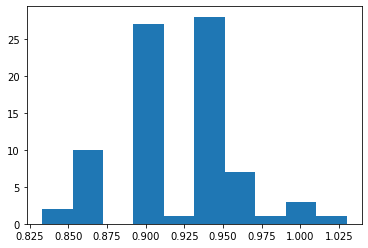

In [45]:
plt.hist(x[:80])

(array([ 4., 16., 25.,  0., 14.,  9.,  0.,  9.,  0.,  3.]),
 array([0.883 , 0.8947, 0.9064, 0.9181, 0.9298, 0.9415, 0.9532, 0.9649,
        0.9766, 0.9883, 1.    ]),
 <BarContainer object of 10 artists>)

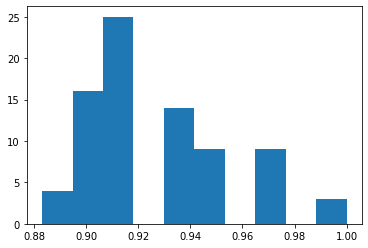

In [44]:
plt.hist(y[:80])

In [61]:
x*3 

0      2.745
1      2.901
2      3.000
3      2.901
4      2.802
       ...  
140    2.700
141    2.799
142    2.799
143    2.700
144    2.601
Name: 7, Length: 145, dtype: float64

In [ ]:
y.shape

In [63]:
(3000 / 3600) * x

0      0.762500
1      0.805833
2      0.833333
3      0.805833
4      0.778333
         ...   
140    0.750000
141    0.777500
142    0.777500
143    0.750000
144    0.722500
Name: 7, Length: 145, dtype: float64

In [28]:
import statsmodels.api as sm



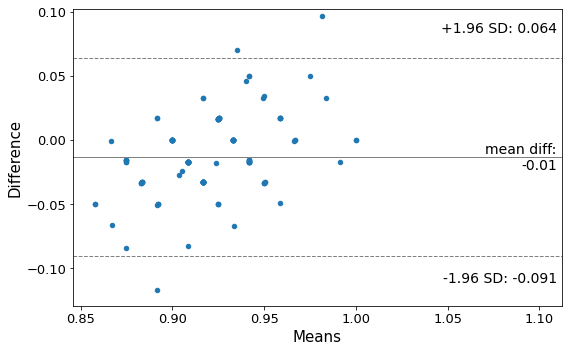

In [29]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(x, y, ax = ax)
plt.show()